# Machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe


<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [6]:
df = data[["Survived", "Pclass", "Sex", "Age", "Fare"]]

In [7]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


## Visualisation des proportions de données  par variables

<Axes: xlabel='Fare', ylabel='Count'>

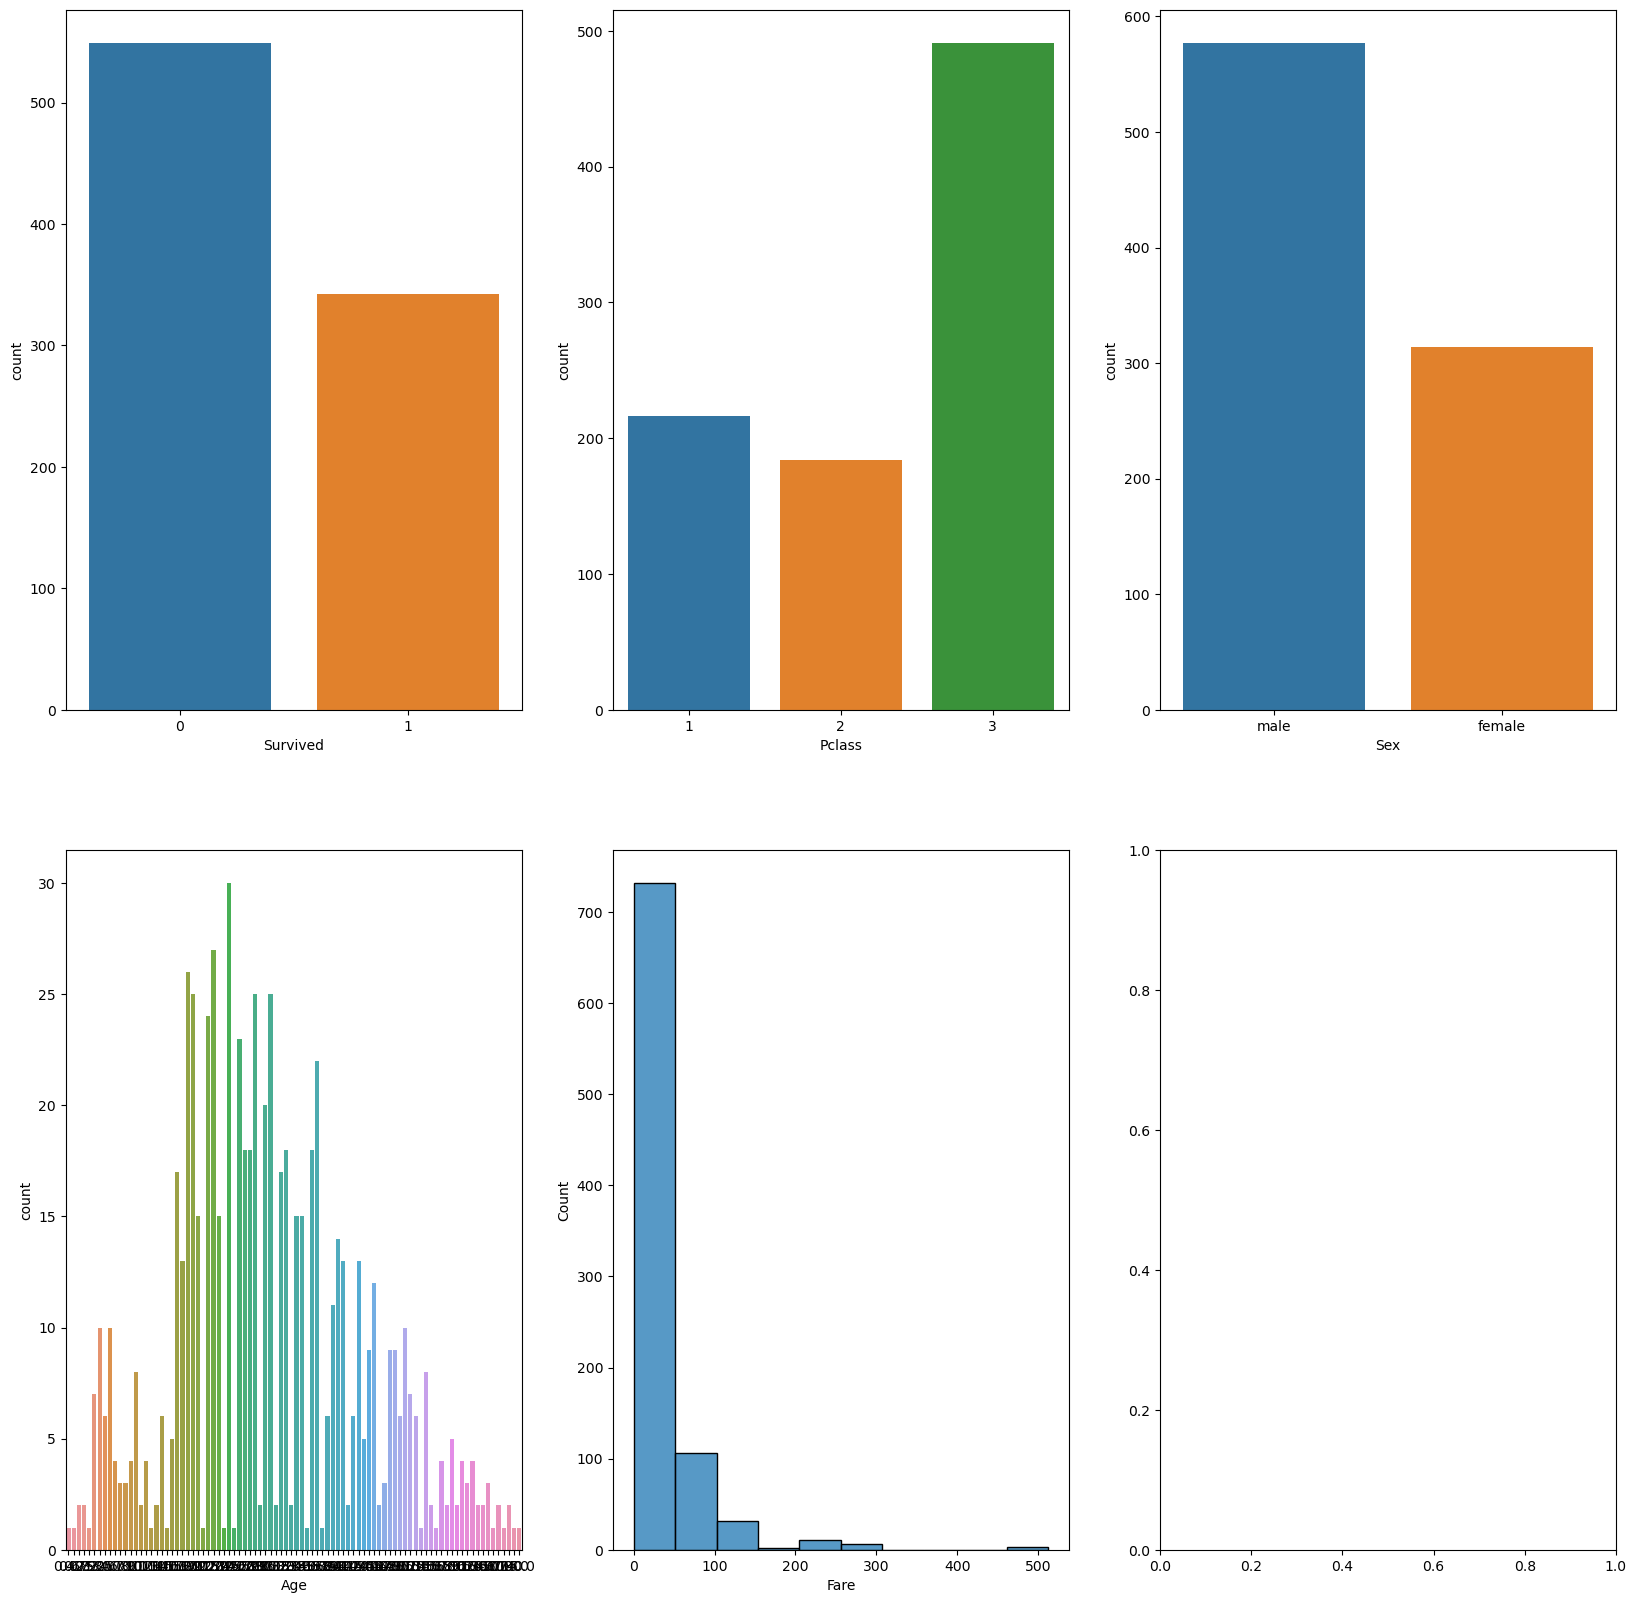

In [8]:

fig, ax = plt.subplots(2,3,figsize=(20,20))
sns.countplot(x = 'Survived', data = df, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = df, ax=ax[0,1])
sns.countplot(x = 'Sex', data = df, ax=ax[0,2])
sns.countplot(x = 'Age', data = df, ax=ax[1,0])
sns.histplot(x = 'Fare', data= df, bins=10, ax=ax[1,1])

 ## Visualisation des proportions de données par rapport à la variable survived

<Axes: xlabel='Pclass', ylabel='Survived'>

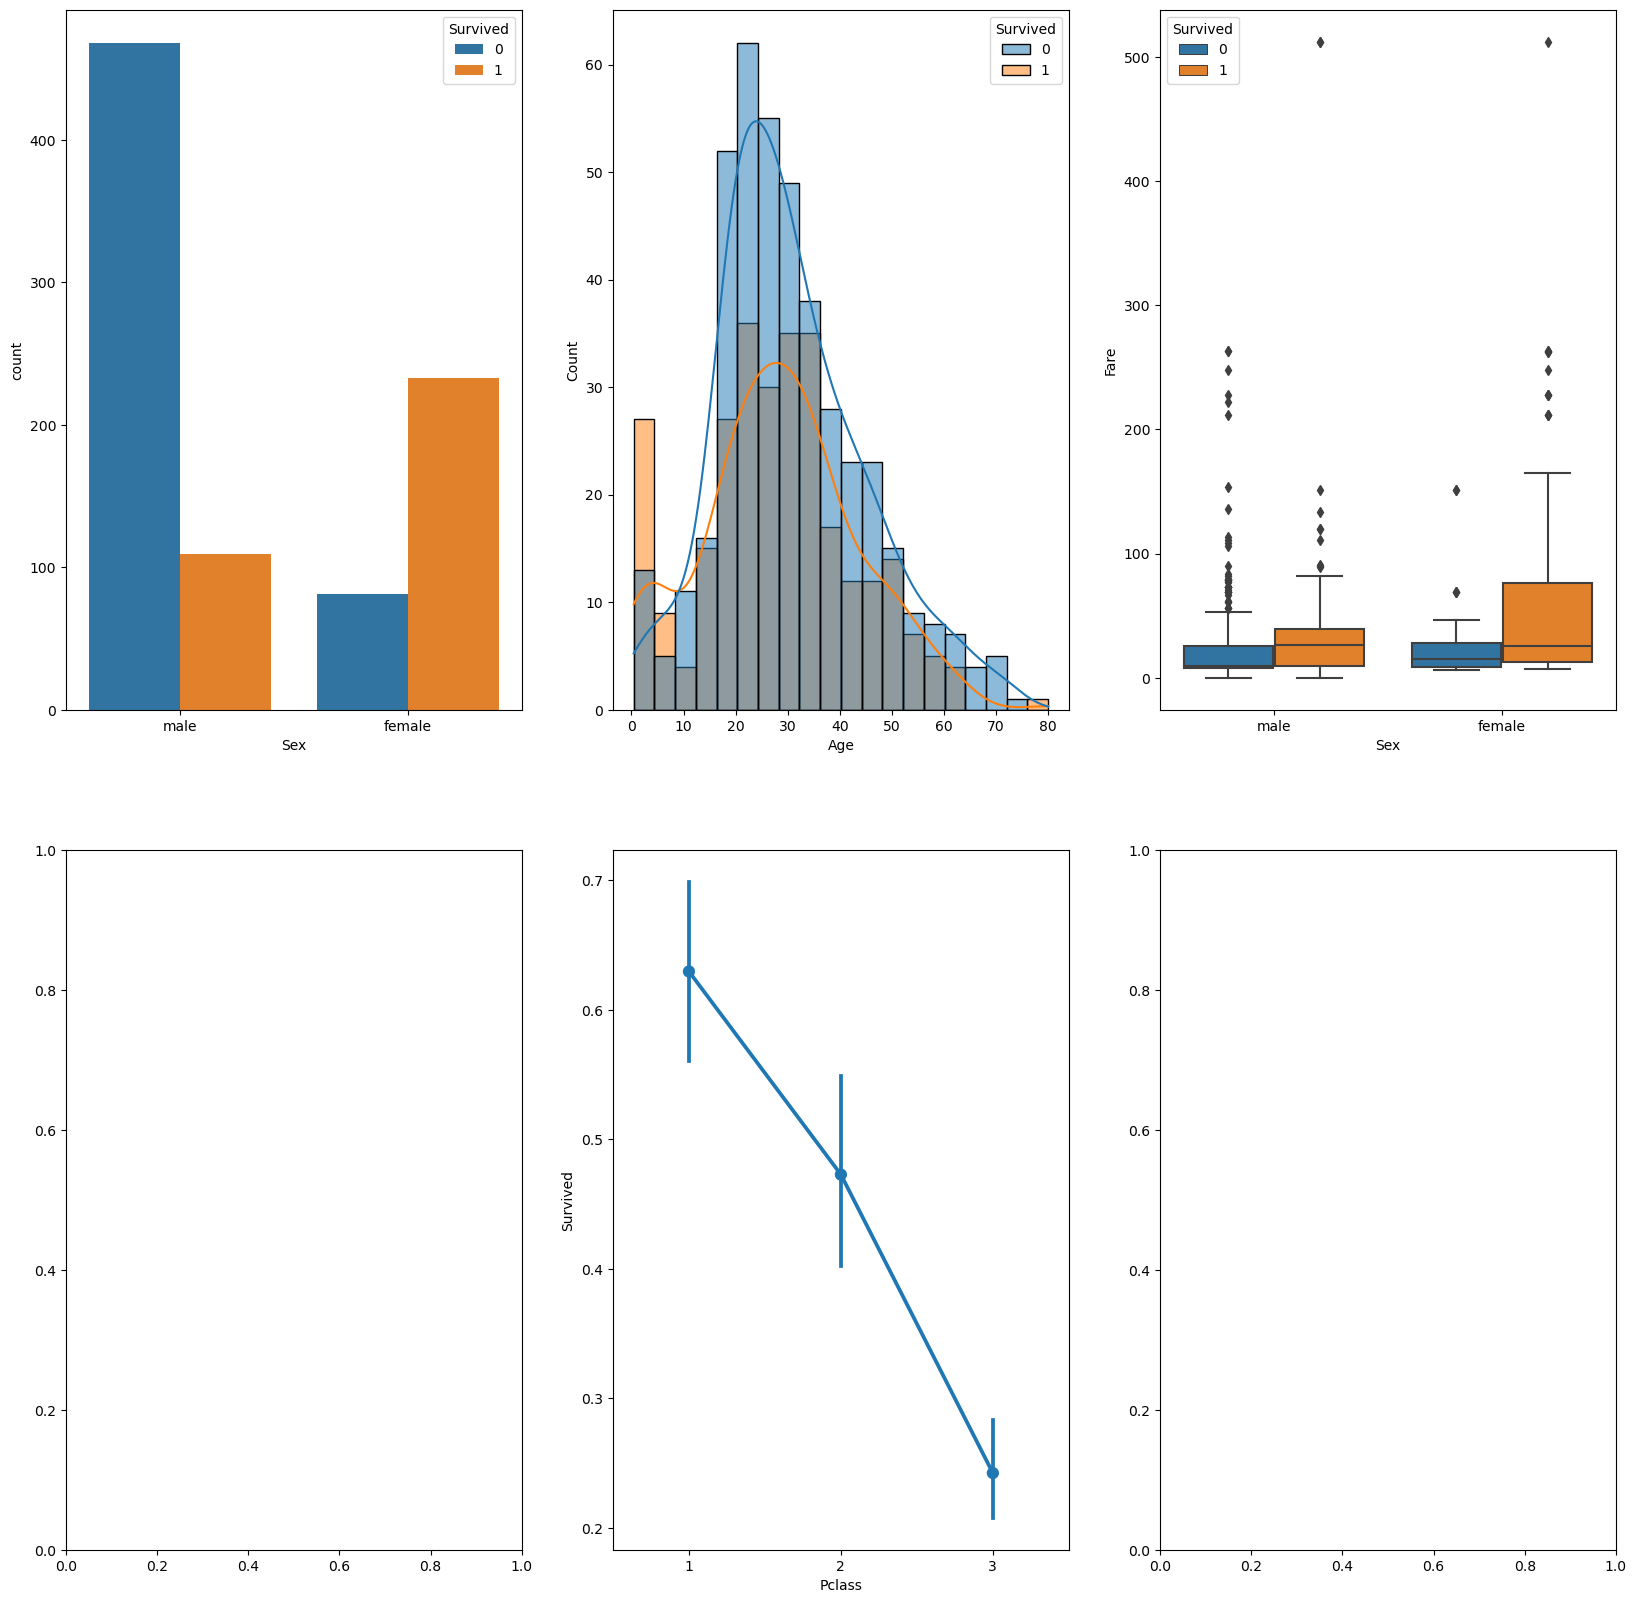

In [9]:
fig, ax = plt.subplots(2,3,figsize=(20,20))
sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0])
sns.histplot(data=df, x='Age', hue='Survived', kde=True,ax=ax[0,1])
#sns.countplot(x = 'Age', data = df, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = df, hue = 'Survived', ax=ax[0,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = df, ax=ax[1,1])

## Détermination des valeurs abbérantes

In [12]:
#détermination des valeurs abérrantes 
median = df.median()




TypeError: could not convert string to float: 'male'

### Traitement des valeurs abérrantes

In [13]:
# Sélectionner les variables quantitatives Fare et Age
quantitative_vars = ["Fare", "Age"]
titanic_quantitative = df[quantitative_vars]

# Définir une fonction pour traiter les valeurs aberrantes
def treat_outliers(df):
    # Calculer les quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    # Calculer l'amplitude interquartile (IQR)
    IQR = Q3 - Q1
    # Définir les bornes inférieures et supérieures
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remplacer les valeurs aberrantes par NaN
    df[(df < lower_bound) | (df > upper_bound)] = np.nan
    return df

# Traiter les valeurs aberrantes
titanic_quantitative_clean = titanic_quantitative.apply(treat_outliers)

# Remplacer les valeurs aberrantes par la médiane
titanic_quantitative_clean.fillna(titanic_quantitative_clean.median(), inplace=True)

# Afficher les statistiques après le traitement des valeurs aberrantes
print("Statistiques après traitement des valeurs aberrantes :\n", titanic_quantitative_clean.describe())


Statistiques après traitement des valeurs aberrantes :
              Fare         Age
count  891.000000  891.000000
mean    17.194299   28.845870
std     12.766009   12.200442
min      0.000000    0.420000
25%      7.910400   22.000000
50%     13.000000   28.000000
75%     24.150000   35.000000
max     65.000000   64.000000


## visualisation des valeurs abbérantes pour le cas de la variable Age

In [ ]:
#afin de mieux visualiser nos valeurs abérantes on utilise une boite à moustache pour le cas des var quantitatives
# Créez un  box plot avec seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df, color='skyblue')
plt.title('Boites à moustache de Age')
plt.xlabel('Variable')
plt.ylabel('Valeurs')
plt.show()

In [ ]:
# Calculer la fréquence de chaque catégorie
frequencies = df['Pclass'].value_counts()

# Définir un seuil pour les valeurs aberrantes (par exemple, 2%)
seuil = 0.1

# Filtrer les catégories rares
valeurs_aberrantes = frequencies[frequencies / len(df) < seuil]

# Créer une catégorie "Autre" pour regrouper les valeurs aberrantes
other_category = pd.Series(len(df) - sum(valeurs_aberrantes), index=['Autre'])

# Concaténer les catégories rares avec la catégorie "Autre"
frequencies = frequencies.append(other_category)

# Créer le diagramme en secteurs
plt.figure(figsize=(8, 8))
plt.pie(frequencies, labels=frequencies.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagramme en secteurs des valeurs qualitatives (avec valeurs aberrantes)')
plt.axis('equal')
plt.show()

#au vu de celà il y'a environ 50% des valeurs qui sont considérées comme abbérantes ou nulles dans notre jeu de données

## Traitement des valeurs abbérantes

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df["Fare"] = scaler.fit_transform(df[["Fare"]])
df["Age"] = scaler.fit_transform(df[["Age"]])

#le traitement des valeurs abbérantes ici  ne s'est fait que sur les données quantitatives d'ou sur Age et Fare juste

In [ ]:
#j'aimerai réprésenter par un diagramme la proportion de valeurs abérantes dans chaque colonne du jeu de donneés

##  Valeurs manquantes

### Détermination des valeurs manquantes

In [ ]:
# déterminer le nbre de valeurs nulles du DataFrame
df.isna().sum()

In [ ]:
#réprésentez nos valeurs manquantes afin de savoir comment les traiter
sns.set_style('dark')
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor']=True
df['Age'].hist(bins=50,color='skyblue')

### Proportion des valeurs manquantes par variables

In [ ]:
# Calculer la proportion de valeurs nulles dans chaque colonne
na_proportion = df.isna().mean() * 100

# Créer un graphique à barres pour représenter la proportion de valeurs nulles
plt.figure(figsize=(10, 6))
na_proportion.plot(kind='bar', color='blue')
plt.title('Proportion de valeurs nulles dans chaque colonne')
plt.xlabel('Colonnes')
plt.ylabel('Proportion de valeurs nulles (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Représentation des coorélations entre les variables par la matrice de corrélation

In [ ]:
#représentation des corrélations entre les variables afin de remplacer les données manquantes
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Créer le heatmap avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de corrélation entre les colonnes')
plt.show()

### Traitement des valeurs manquantes

In [ ]:
from sklearn.impute import SimpleImputer
# Imputation par la médiane dans la colonne avec des valeurs manquantes
median_imputer = SimpleImputer(strategy='median')
df['Age'] = median_imputer.fit_transform(df[['Age']])
# déterminer le nbre de valeurs nulles du DataFrame après transformation des valeurs manquantes
df.isna().sum()

### Nouvel histogramme après traitement des valeurs manquantes dans la variable age

In [ ]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Histogram of Age by Survival Status')
plt.show()

## Traitement des données de la variable Sex

In [ ]:
#replacing with 1 and female with 0
df["Sex"]=df["Sex"].replace({"male":0, "female":1})
print(df)

In [ ]:
from sklearn.metrics import accuracy_score

In [10]:

from sklearn.model_selection import train_test_split
Y = df["Survived"]
X = df[["Pclass", "Sex", "Age", "Fare"]]

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Methode de regression logistique

In [11]:

#Elle est souvent utilisée pour prédire la probabilité de survie des passagers en fonction de diverses caractéristiques.
from sklearn.linear_model import LogisticRegression

# Initialisation du modèle de régression logistique
model = LogisticRegression()

# Entraînement du modèle
model.fit(X_train, Y_train)

# Prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# Évaluation du modèle
accuracy_linear = accuracy_score(Y_test, predictions)
#report = classification_report(Y_test, predictions)

# Affichage des résultats
print("Accuracy:", accuracy_linear)

ValueError: could not convert string to float: 'male'

### Méthode des arbres de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree
dtree.fit(X_train,Y_train)
dtree_score=dtree.score(X_test,Y_test)

### Méthode svc

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train)
score_svm=svm.score(X_test,Y_test)


### Méthode des K-plus proches voisins

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
score_knn=knn.score(X_test,Y_test)


ValueError: could not convert string to float: 'male'

In [15]:
Scores=[score_knn,score_svm,dtree_score,accuracy_linear]
method=["KNeighborsClassifier","SVC","DecisionTreeClassifier","Logistic_Regression"]
datascore=pd.DataFrame({'méthodes': method, 'Scores_associés': Scores})


NameError: name 'score_knn' is not defined

### scores associés aux différentes méthodes

In [13]:
datascore

NameError: name 'datascore' is not defined